In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import operator
import math
from scipy.spatial import distance
from matplotlib import pyplot
from numpy import linalg as la

In [6]:
def grad_i(l, i, x, y, kernel):
    n = len(x)
    return 1 + y[i] * sum([l[j] * y[j] * kernel(x[i], x[j]) for j in range(n)])

def grad(l, x, y, kernel):
    n = len(x)
    return [grad_i(l, i, x, y, kernel) for i in range(n)]

def e(k, n):
    return [1 if i == k else 0 for i in range(n)]

def proj(b, a):
    return ((np.dot(a, b) / np.dot(b, b)) * np.array(b)).tolist()

def grammShmidt(y, vectors):
    s = np.zeros(n)
    for i in range(len(vectors)):
        s += proj(vectors[i], y)
    return (np.array(y) - s).tolist()

def learn(objects, kernel, C, alpha, eps):
    n = len(objects)
    x = [obj['vector'] for obj in objects]
    y = [obj['class'] for obj in objects]
    l = [C / 2.0 for i in range(n)]
    dl = grad(l, x, y, kernel)
    while la.norm(dl) > eps:
        dl = grad(l, x, y, kernel)
        l1 = [l[i] + alpha * dl[i] for i in range(n)]
        good = []
        bad = []
        for i in range(n):
            if (l[i] <= 0.0 and dl[i] < 0) or (l[i] >= C and dl[i] > 0):
                bad.append(e(i, n))
            else:
                good.append(e(i, n))
        if len(bad) != 0:
            good.append(grammShmidt(y, good))
            dl = grammShmidt(dl, good,)
            l = [l[i] + alpha * dl[i] for i in range(n)]
        else:
            l = l1
    w = np.zeros(n)
    si = 0
    for i in range(n):
        w += (l[i] * y[i]) * np.array(x[i])
        if l[i] > 0 and l[i] < C:
            si = i
    b = w * np.array(x[i]) - y[i]
    return lambda newX: np.sign(sum([l[i] * y[i] * kernel(x[i], newX)] - b))

In [12]:
def readNormalizedData(file):
    df = pd.read_csv(file, sep=",")
    classes = [1 if c == 'P' else -1 for c in df["class"]]
    features = df.drop(columns="class").to_numpy()
    objects = []
    for i in range(len(classes)):
        objects.append({'class' : classes[i], 'vector': features[i]})
    return objects

In [16]:
def splitData(objects, l):    
    for obj in objects:
        if obj['class'] == 1:
            pyplot.plot([obj['vector'][0]], [obj['vector'][1]], 'ro', color='red')
        else:
            pyplot.plot([obj['vector'][0]], [obj['vector'][1]], 'ro', color='blue')
    pyplot.show()
    
    train = []
    test = []
    for i in range(len(objects)):
        if i % l != l - 1:
            train.append(objects[i])
        else:
            test.append(objects[i])
    return train, test, 2

In [17]:
def getData(file):
    return splitData(readNormalizedData(file), 5)

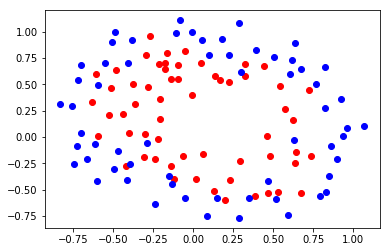

train size: 95 
test size: 23 
classes: 2 
features: 2


In [18]:
train, test, n = getData('SVM/chips.csv')
print("train size:", len(train), "\ntest size:", len(test), "\nclasses:", n,"\nfeatures:",  len(train[0]['vector']))

In [19]:
def kernrl(x, y):
    d = np.array(x) - np.array(y)
    return math.exp(-np.dot(d, d) / (2 * 0.25 ** 2))

In [20]:
classifier = learn(train, kernrl, 1.0, 1e-2, 0.01)

ValueError: operands could not be broadcast together with shapes (2,) (95,) (2,) 